In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np


import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [17]:
df = pd.read_csv('Downloads/internship/original_generated_dataset.csv')

Desplay dataset

In [19]:
df

,Duration,Franchise
0,1.13,31.13
1,3.95,8.02
2,3.81,73.02
3,3.95,81.90
4,2.70,19.77
...,...,...
2991,4.83,81.69
2992,2.26,23.24
2993,3.94,78.45
2994,5.27,84.09


Prepare Report Profile for the dataset, save it and Desplay it

In [20]:
import pandas as pd
from pandas_profiling import ProfileReport


profile = ProfileReport(df, title='internship Pandas Profiling Report Version', explorative=True)

profile.to_file("Downloads/internship/internship_version.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
profile.to_notebook_iframe()

# Now we finished with data cleaning , let's deal with data preprocessing

Plot the outliers using IQR method

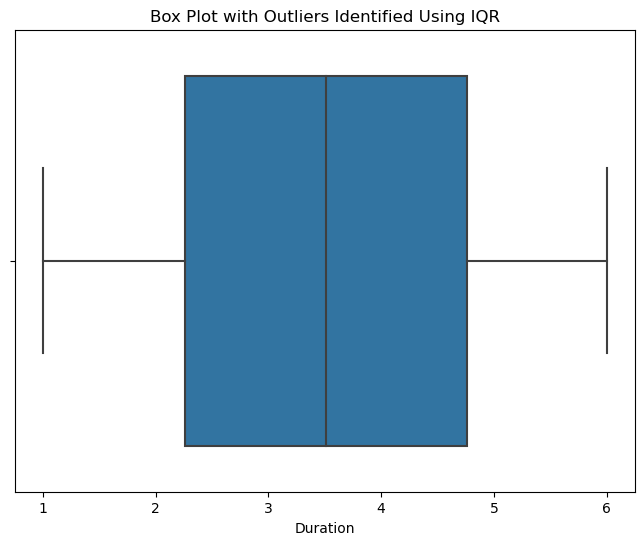

In [22]:
#%matplotlib inline
import matplotlib.pyplot as plt

# Calculate the IQR
Value = 'Duration'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

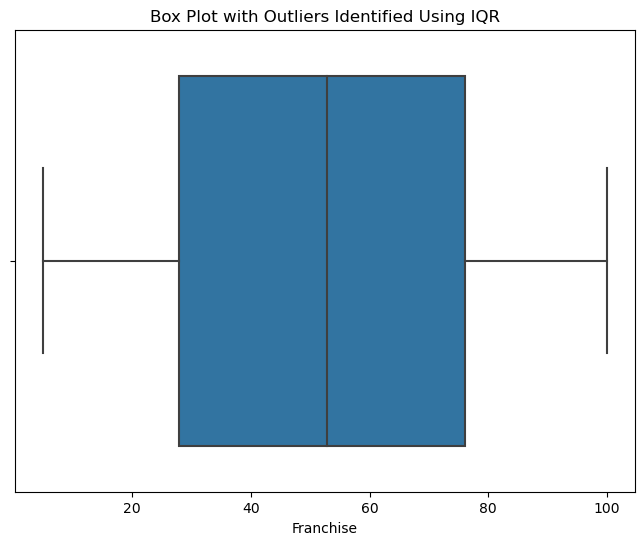

In [23]:
import matplotlib.pyplot as plt
 

# Calculate the IQR
Value = 'Franchise'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

In [24]:
df.to_csv('Downloads/internship/internship_dataset_dataset_cleaning_preprocessing.csv' , index=False)

# Unsupervised learning : EM

Comparing with (Davies-Bouldin Index vs. Number of Clusters diagram and Silhouette Score vs. Number of Clusters diagram and Elbow) to detect best k for cluster's number using the dataset df_tsne generated by tsne model without data scaling cuz we want the number of clusters to be big to keeping the car insurance recommended to the client closer to what he or she want

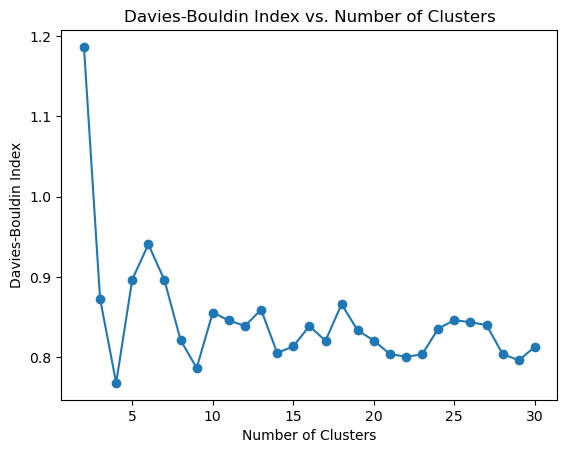

Optimal Number of Clusters: 4


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

# Range of cluster numbers to try
num_clusters_range = range(2, 31)

# List to store Davies-Bouldin Index scores
davies_bouldin_scores = []

for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(X)
    davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))

# Plotting the Davies-Bouldin Index scores
plt.plot(num_clusters_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Find the optimal number of clusters with the lowest Davies-Bouldin Index
optimal_num_clusters = num_clusters_range[np.argmin(davies_bouldin_scores)]
print("Optimal Number of Clusters:", optimal_num_clusters)


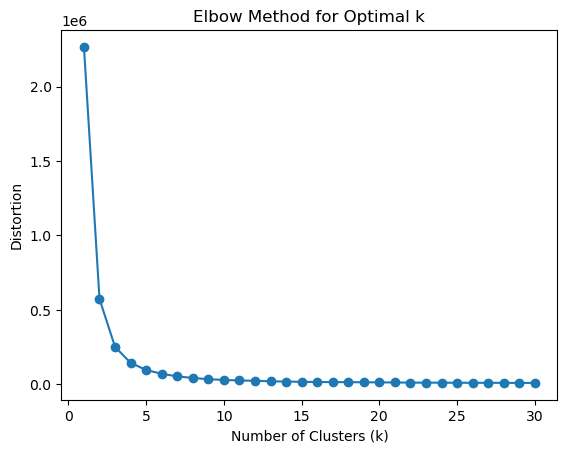

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

distortions = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 31), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()


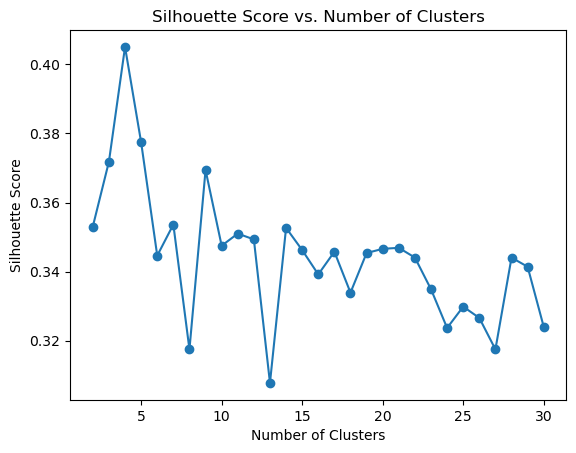

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

# Range of cluster numbers to try
num_clusters_range = range(2, 31)

# List to store silhouette scores
silhouette_scores = []

for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plotting the Elbow Curve
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


EM to train the model on the df dataset to get the cluster output , I choose num_clutsers=30 after analysing the interval of each cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster 0 Intervals:
Duration: Min = 1.01, Max = 1.62
Franchise: Min = 56.45, Max = 83.38
---------------------
Cluster 1 Intervals:
Duration: Min = 2.95, Max = 4.21
Franchise: Min = 47.9, Max = 67.19
---------------------
Cluster 2 Intervals:
Duration: Min = 2.38, Max = 3.52
Franchise: Min = 5.15, Max = 20.94
---------------------
Cluster 3 Intervals:
Duration: Min = 5.49, Max = 5.99
Franchise: Min = 40.49, Max = 63.26
---------------------
Cluster 4 Intervals:
Duration: Min = 5.49, Max = 6.0
Franchise: Min = 23.23, Max = 38.31
---------------------
Cluster 5 Intervals:
Duration: Min = 3.95, Max = 4.66
Franchise: Min = 84.01, Max = 99.87
---------------------
Cluster 6 Intervals:
Duration: Min = 1.57, Max = 2.61
Franchise: Min = 50.09, Max = 69.19
---------------------
Cluster 7 Intervals:
Duration: Min = 1.01, Max = 1.47
Franchise: Min = 5.32, Max = 19.12
---------------------
Cluster 8 Intervals:
Duration: Min = 1.93, Max = 2.91
Franchise: Min = 85.14, Max = 99.93
------------------

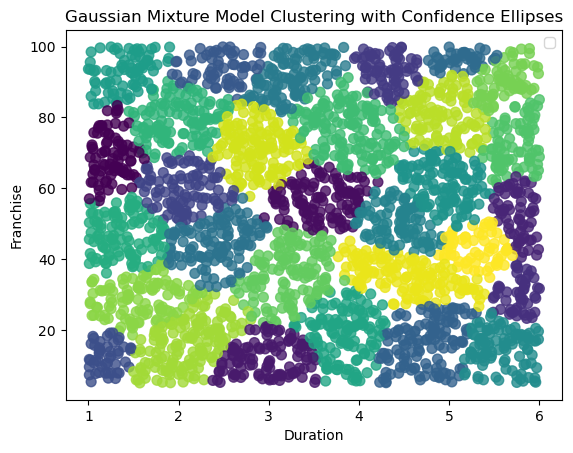

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

scaler = StandardScaler()
X = scaler.fit_transform(df)


# Choose the number of clusters (you may need to tune this)
num_clusters = 30

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Print intervals for each cluster
for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    cluster_data = df.iloc[cluster_indices]

    feature1_interval = (cluster_data['Duration'].min(), cluster_data['Duration'].max())
    feature2_interval = (cluster_data['Franchise'].min(), cluster_data['Franchise'].max())

    print(f"Cluster {i} Intervals:")
    print(f"Duration: Min = {feature1_interval[0]}, Max = {feature1_interval[1]}")
    print(f"Franchise: Min = {feature2_interval[0]}, Max = {feature2_interval[1]}")
    print("---------------------")

# Plot the clusters with confidence ellipses
plt.scatter(df['Duration'], df['Franchise'], c=labels, cmap='viridis', s=50, alpha=0.8)



plt.title('Gaussian Mixture Model Clustering with Confidence Ellipses')
plt.xlabel('Duration')
plt.ylabel('Franchise')
plt.legend()
plt.show()


In [26]:
df

,Duration,Franchise,Cluster
0,1.13,31.13,24
1,3.95,8.02,17
2,3.81,73.02,20
3,3.95,81.90,20
4,2.70,19.77,25
...,...,...,...
2991,4.83,81.69,26
2992,2.26,23.24,25
2993,3.94,78.45,20
2994,5.27,84.09,23


In [27]:
df.to_csv('Downloads/internship/internship_model_dataset.csv', index=False)

# Supervised learning : Random Forest

Train the robust classifier ml model Random Forset on the dataset df which contains Duration , Franchise and Cluster output and Evaluate it


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Split the data into features and target
X = df[['Duration', 'Franchise']]
y = df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the target labels on the test set
y_pred = classifier.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Get feature importances
feature_importances = classifier.feature_importances_

# Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 

Test the model classifier

In [29]:
y_pred = classifier.predict(X_test)
print(y_pred)

[ 3 13 21 18  0  1 29 13 15 19  5 19 23 25 21  2 18 24 29 24 12 27 25 16
 24 11 26  6 18 17 12  0  1  1 28 18  6 21  2 15  7 14 21 25 16  1 21  6
 24  5 14  0  2 16 28 24 25 11 26  9  5 10 27 11  5 19 11  9 17 11  6 17
 18 27 18  8 21 19 25  6 12  1 11 11 18 22 19 18  2 22  9 27 27  9 18 25
 20  9 28 12 13 22  2 24 12 14 24  5 19 14 25 27 26 14 28 17 24  9 17 21
 25 22 26  9 24  2 11 24 25 27  6 18  5 29 14 23 19 26 15  1 11  6 18  6
  8 17 27 14 22 25 25 15  6  3  4 23  2 27 11 19 21 10  5  4  1  0 26  2
 17 25 20 14 18 13 15 26  5 27  9  5  4  4 27  9 21 22  0 13  7  5 19 20
  0  0 19 13 19  0  0 26 22 27  8 23 23 28  0  9 27 17  1  1 19 22 15 15
  1 11 26 20 15  8 13 22 17 22 15 10  3 11 24 20 14 12  1 25  8 24 27 18
 21  9 25 25 21 27 27 22 11 28 18 15  0 28 28  9 13 27 25  7 20 14 18 16
 21 25  3 11  6 22 12  2  7 19 22  1 18 28 20 28 21 23 28  6 23 25 21 25
 11 26 23  5  1 27 10 18 28 19 28  9 23  6 14  0 13  6 13  2 29 26 25 24
 13 25  0 21 20 20 19 16 28 12 13 27 25 14 25 25  6

Export the model in an external file with joblib extension to use it for deployment

In [30]:
import joblib

joblib.dump(classifier, 'Downloads/internship/internship_random_forest_model.joblib')

['Downloads/internship/internship_random_forest_model.joblib']